# Step 1: Load Cleaned Dataset

In [2]:
# 📘 Step 1: Load Cleaned Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("../data/cicids2017_cleaned.csv")
print("✅ Dataset shape:", df.shape)
df.head()


/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_17579/3074598501.py:7: DtypeWarning: Columns (78,80,81,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/cicids2017_cleaned.csv")


✅ Dataset shape: (5950088, 86)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Idle Max,Idle Min,Label,source_file,Flow ID,Source IP,Source Port,Destination IP,Protocol,Timestamp
0,22.0,166.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
1,60148.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
2,123.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
3,123.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13600000.0,5700287.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Drop Unnecessary Columns

In [3]:
# 🧼 Step 2: Drop Unnecessary Columns
cols_to_drop = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'source_file']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True, errors='ignore')
print("Remaining columns:", df.columns.shape)


Remaining columns: (84,)


## Step 3: Handle NaN / Infinite Values


In [4]:
# 🧹 Step 3: Handle NaN / Infinite Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("✅ Cleaned NaNs. Shape:", df.shape)


✅ Cleaned NaNs. Shape: (2827876, 84)


## Step 4: Encode Label Column

In [5]:
# 🎯 Step 4: Encode Label Column
le = LabelEncoder()
df['Label_Encoded'] = le.fit_transform(df['Label'])
print("Labels:", dict(zip(le.classes_, le.transform(le.classes_))))


Labels: {'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack \x96 Brute Force': 12, 'Web Attack \x96 Sql Injection': 13, 'Web Attack \x96 XSS': 14}


## Step 5: Define Features and Target

In [6]:
# 📊 Step 5: Define Features and Target (with auto-filtering)
X = df.drop(columns=['Label', 'Label_Encoded'])

# 🧹 Drop non-numeric columns (e.g., IPs, strings)
X = X.select_dtypes(include=[np.number])

y = df['Label_Encoded']

# ✅ Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Training shape: {X_train.shape}, Test shape: {X_test.shape}")




✅ Training shape: (2262300, 80), Test shape: (565576, 80)


## Train RandomForest + Evaluate

✅ Accuracy: 0.999250321795833

📄 Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454265
                       Bot       0.98      0.95      0.97       391
                      DDoS       1.00      1.00      1.00     25605
             DoS GoldenEye       1.00      0.99      1.00      2059
                  DoS Hulk       1.00      1.00      1.00     46025
          DoS Slowhttptest       0.99      0.99      0.99      1100
             DoS slowloris       1.00      1.00      1.00      1159
               FTP-Patator       1.00      1.00      1.00      1587
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.57      0.73         7
                  PortScan       1.00      1.00      1.00     31761
               SSH-Patator       1.00      1.00      1.00      1180
  Web Attack  Brute Force       0.81      0.90      0.85 

/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_17579/2844068342.py:26: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


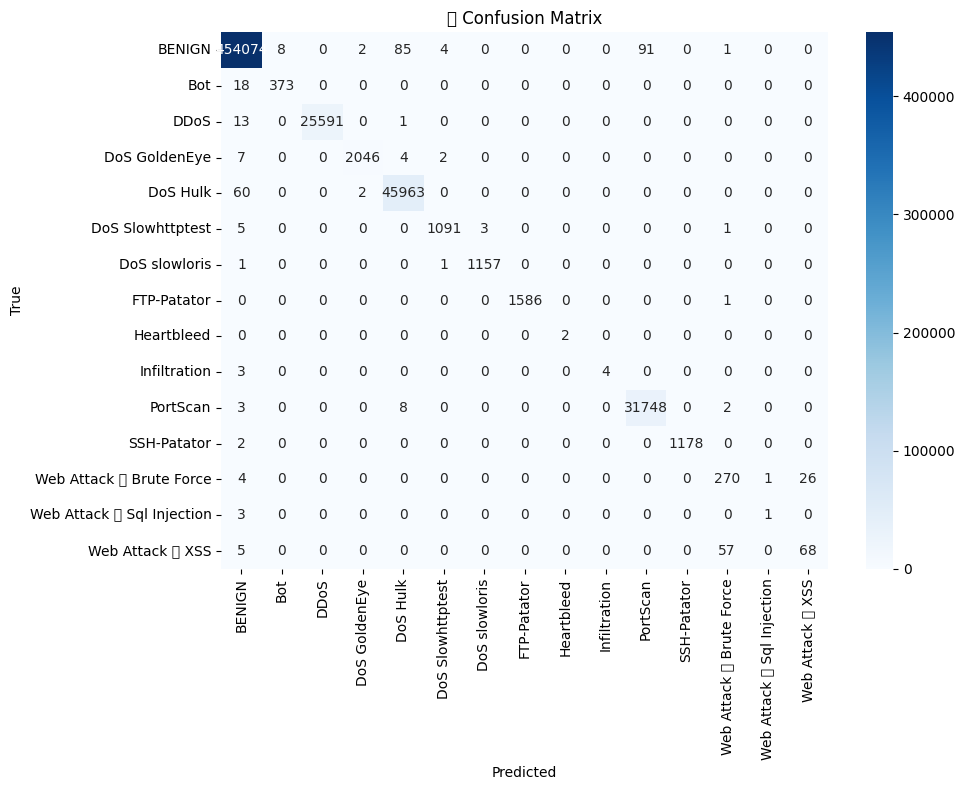

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ⏳ Train
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ✅ Predict
y_pred = clf.predict(X_test)

# 📊 Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 🧩 Confusion Matrix (optional plot)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("🧩 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


## SHAP Explainability

In [ ]:
print(list(class_names))

import unicodedata

# Helper to normalize weird dashes and spaces
def normalize_label(label):
    return unicodedata.normalize("NFKD", label).replace('\x96', '-').replace('–', '-').strip().lower()

# Normalize the class names once
normalized_class_map = {
    normalize_label(label): label for label in class_names
}

# Target classes (normalized versions)
target_classes_raw = ['Web Attack - Sql Injection', 'Infiltration']

for raw_label in target_classes_raw:
    normalized = normalize_label(raw_label)
    if normalized in normalized_class_map:
        class_label = normalized_class_map[normalized]
        class_index = list(class_names).index(class_label)

        plt.title(f"SHAP Summary Plot for Class: {class_label}")
        shap.summary_plot(
            shap_values[class_index],
            X_test[:1000],
            feature_names=X.columns,
            show=False
        )
        fname = f"../visualizations/Shap_summary_{normalized.replace(' ', '_')}.png"
        plt.savefig(fname, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved {fname}")
    else:
        print(f"❌ Could not find class: {raw_label}")



['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack \x96 Brute Force', 'Web Attack \x96 Sql Injection', 'Web Attack \x96 XSS']


Glyph 150 (\x96) missing from font(s) DejaVu Sans.
Glyph 150 (\x96) missing from font(s) DejaVu Sans.


✅ Saved ../visualizations/Shap_summary_web_attack_-_sql_injection.png
✅ Saved ../visualizations/Shap_summary_infiltration.png


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ⚠️ If not installed, run: pip install xgboost

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

# 🔍 Metrics
print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📄 XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# 📊 Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("../visualizations/xgboost_confusion_matrix.png")
plt.show()


`use_label_encoder` is deprecated in 1.7.0.


In [ ]:
%pip install scikit-learn matplotlib



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


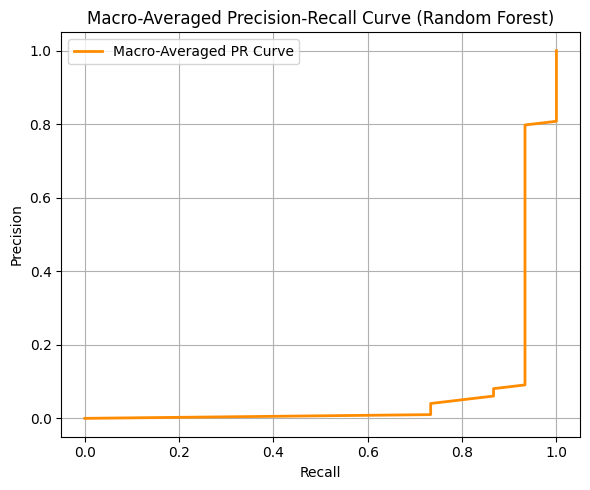

✅ Saved: ../visualizations/PR_curve_rf.png


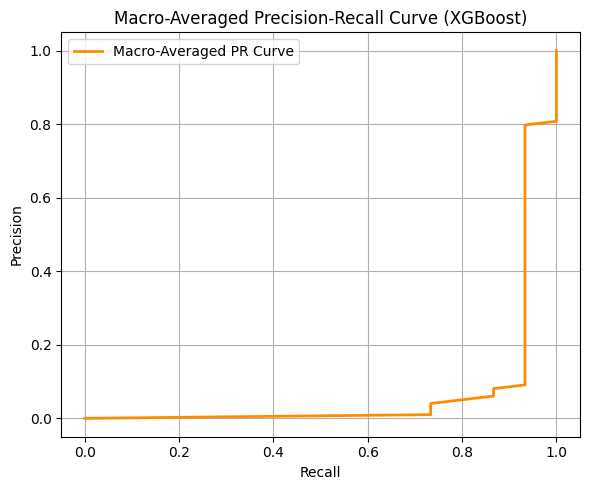

✅ Saved: ../visualizations/PR_curve_xgboost.png


In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

def plot_macro_avg_pr_curve(clf_name, model, X_test, y_test, le, save_path):
    # Predict class probabilities
    y_score = model.predict_proba(X_test)

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(len(le.classes_)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Interpolate recall at common precision values
    precision_range = np.linspace(0, 1, 100)
    recall_interp = []

    for i in range(len(le.classes_)):
        r = np.interp(precision_range, precision[i][::-1], recall[i][::-1])
        recall_interp.append(r)

    recall_macro = np.mean(recall_interp, axis=0)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(recall_macro, precision_range, label='Macro-Averaged PR Curve', color='darkorange', lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Macro-Averaged Precision-Recall Curve ({clf_name})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    print(f"✅ Saved: {save_path}")

# Run for Random Forest
plot_macro_avg_pr_curve("Random Forest", clf, X_test, y_test, le, "../visualizations/PR_curve_rf.png")

# Run for XGBoost
plot_macro_avg_pr_curve("XGBoost", xgb_clf, X_test, y_test, le, "../visualizations/PR_curve_xgboost.png")


In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
import numpy as np

# Predict probabilities
rf_probs = clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)

# Binarize ground truth
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

# Macro AUC-PR
rf_auc_pr = average_precision_score(y_test_bin, rf_probs, average="macro")
xgb_auc_pr = average_precision_score(y_test_bin, xgb_probs, average="macro")

print(f"Random Forest Macro-AUC PR: {rf_auc_pr:.4f}")
print(f"XGBoost      Macro-AUC PR: {xgb_auc_pr:.4f}")


Random Forest Macro-AUC PR: 0.9492
XGBoost      Macro-AUC PR: 0.9692


In [22]:
import pandas as pd
from sklearn.utils import resample

# Convert to DataFrame for easier handling
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.Series(y_train)

# Combine for easier sampling
combined = X_train_df.copy()
combined['Label'] = y_train_df.values

# Get all unique classes
all_classes = combined['Label'].unique()

# Set per-class sample sizes
samples_per_class = 100000 // len(all_classes)

balanced_samples = []

# Sample equally from each class
for cls in all_classes:
    class_subset = combined[combined['Label'] == cls]
    sampled = resample(class_subset, replace=True, n_samples=samples_per_class, random_state=42)
    balanced_samples.append(sampled)

# Combine all class samples
final_sample = pd.concat(balanced_samples).sample(frac=1, random_state=42)  # shuffle

# Split features and labels again
X_train_small = final_sample.drop(columns=['Label']).values
y_train_small = final_sample['Label'].values


In [23]:
xgb_clf.fit(X_train_small, y_train_small)

plot_macro_avg_pr_curve("XGBoost", xgb_clf, X_test, y_test, le, "../visualizations/PR_curve_xgboost.png")


NameError: name 'plot_macro_avg_pr_curve' is not defined

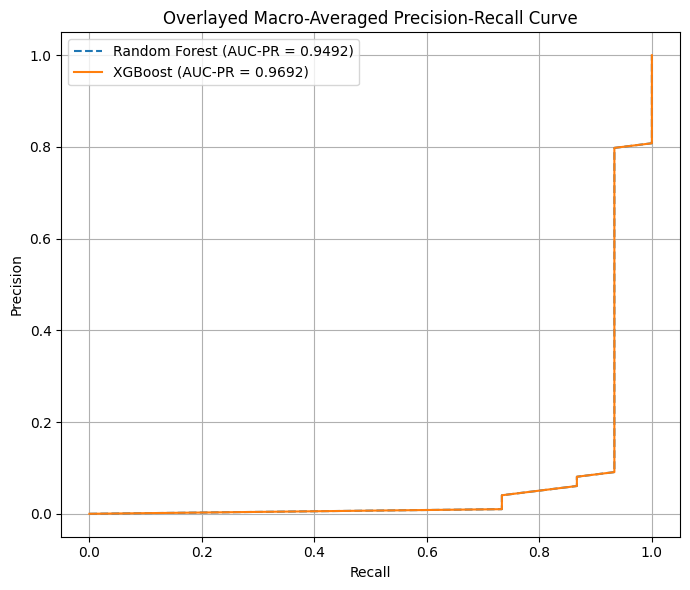

✅ Saved: PR_curve_overlay.png


In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test for multi-class
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

# Predict probabilities
rf_probs = clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)

# Compute PR curves for each class
def compute_macro_pr_curve(y_true_bin, y_probs, model_name):
    precision = dict()
    recall = dict()

    for i in range(y_probs.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])

    # Interpolate to common precision range
    precision_range = np.linspace(0, 1, 100)
    recall_interp = []
    for i in range(y_probs.shape[1]):
        r = np.interp(precision_range, precision[i][::-1], recall[i][::-1])
        recall_interp.append(r)

    recall_macro = np.mean(recall_interp, axis=0)
    auc_macro = average_precision_score(y_true_bin, y_probs, average="macro")
    return precision_range, recall_macro, auc_macro

# Compute curves
p_rf, r_rf, auc_rf = compute_macro_pr_curve(y_test_bin, rf_probs, "Random Forest")
p_xgb, r_xgb, auc_xgb = compute_macro_pr_curve(y_test_bin, xgb_probs, "XGBoost")

# Plot overlay
plt.figure(figsize=(7, 6))
plt.plot(r_rf, p_rf, label=f'Random Forest (AUC-PR = {auc_rf:.4f})', linestyle='--')
plt.plot(r_xgb, p_xgb, label=f'XGBoost (AUC-PR = {auc_xgb:.4f})', linestyle='-')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Overlayed Macro-Averaged Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../visualizations/PR_curve_overlay.png")
plt.show()

print("✅ Saved: PR_curve_overlay.png")
